In [5]:
import os
import pandas as pd
import glob
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from ispots.anomaly_detector import AutoAD, Preprocessor

In [18]:
# load data into a dictionary
#elec_input_folder = "inputdata/" + 'JC' + "/electrical/monthly/"
path = os.path.abspath('JC/electrical')
csv_files = glob.glob(os.path.join(path, "*.csv"))
pre_data_dict = {}
for f in csv_files:
    df = pd.read_csv(f)
    pre_data_dict[f.split("/")[-1][:-4]] = df

In [17]:
pre_data_dict['dsta_blk-126-elect'].Time

0      2023-01-01 00:00:00
1      2023-01-01 00:30:00
2      2023-01-01 01:00:00
3      2023-01-01 01:30:00
4      2023-01-01 02:00:00
               ...        
3021   2023-03-05 22:00:00
3022   2023-03-05 22:30:00
3023   2023-03-05 23:00:00
3024   2023-03-05 23:30:00
3025   2023-03-06 00:00:00
Name: Time, Length: 3026, dtype: datetime64[ns]

During preprocessing, measuring points with missing values more than the miss_val_threshold will be removed from the data dictionary and no further analysis will be performed.

In [19]:
# preprocess data
preprocessor = Preprocessor(pre_data_dict, miss_val_threshold = 0.01)
data_dict, missing = preprocessor.preprocess()


dsta_blk-126-elect: missing values 47
dsta_blk-221-elect: missing values 32
dsta_blk-302-elect: missing values 38
dsta_blk-101-elect: missing values 24
dsta_blk-127-elect: missing values 32
dsta_blk-201-elect: missing values 37
dsta_blk-303-elect: missing values 31
dsta_blk-100-elect: missing values 40
dsta_blk-322-elect: missing values 34
dsta_blk-207-elect: missing values 34
dsta_blk-213-elect: missing values 32
dsta_blk-124-elect: missing values 36
dsta_blk-223-elect: missing values 33
dsta_blk-216-elect: missing values 33
dsta_blk-202-elect: missing values 31
dsta_blk-209-elect: missing values 39


ValueError: too many values to unpack (expected 2)

In [12]:
print(preprocessor.data_frequency)
print(preprocessor.start_ts)
print(preprocessor.end_ts)

0 days 00:30:00


AttributeError: 'Preprocessor' object has no attribute 'start_ts'

To identify anomalies on 1 date, the following cell can be run. 

In this example, all measuring points in the data dictionary are analysed for anomalies.

Instead of specifying 1 date, you can also include a range of dates for anomaly detection. Ensure that the data for 90 (+ buffer) days prior to the start date is available in the data dictionary. 

For measuring points with weekday-weekend consumption difference, buffer = 7. Otherwise, buffer = 5.

In the following, we detect for anomalies in the measuring point 'aircon-load-elect' over the period 2022-12-1 to 2022-12-31.

dsta_blk-126-elect: missing values 47
dsta_blk-221-elect: missing values 32
dsta_blk-302-elect: missing values 38
dsta_blk-101-elect: missing values 24
dsta_blk-127-elect: missing values 32
dsta_blk-201-elect: missing values 37
dsta_blk-303-elect: missing values 31
dsta_blk-100-elect: missing values 40
dsta_blk-322-elect: missing values 34
dsta_blk-207-elect: missing values 34
dsta_blk-213-elect: missing values 32
dsta_blk-124-elect: missing values 36
dsta_blk-223-elect: missing values 33
dsta_blk-216-elect: missing values 33
dsta_blk-202-elect: missing values 31
dsta_blk-209-elect: missing values 39
dsta_blk-301-elect2023-02-01
dsta_blk-301-elect2023-02-02
dsta_blk-301-elect2023-02-03
dsta_blk-301-elect2023-02-04
dsta_blk-301-elect2023-02-05
dsta_blk-301-elect2023-02-06
dsta_blk-301-elect2023-02-07
dsta_blk-301-elect2023-02-08
dsta_blk-301-elect2023-02-09
dsta_blk-301-elect2023-02-10
dsta_blk-301-elect2023-02-11
dsta_blk-301-elect2023-02-12
dsta_blk-301-elect2023-02-13
dsta_blk-301-el

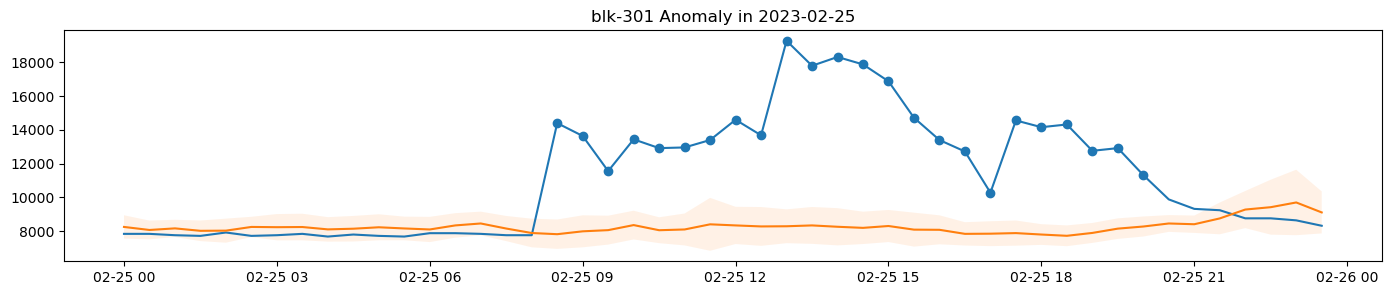

Sequence Anomaly observed
Sequence Anomaly observed from 2023-02-25 08:30:00 to 2023-02-25 20:00:00 
Deviation: 147530.0 Wh, Deviation % = 37.22% 

Namespace: JC
NO 2 anomalous measuring point: dsta_blk-301-elect
Date of detection: 2023-02-13
Deviation: 99170.71 Wh, Deviation %: 16.6%


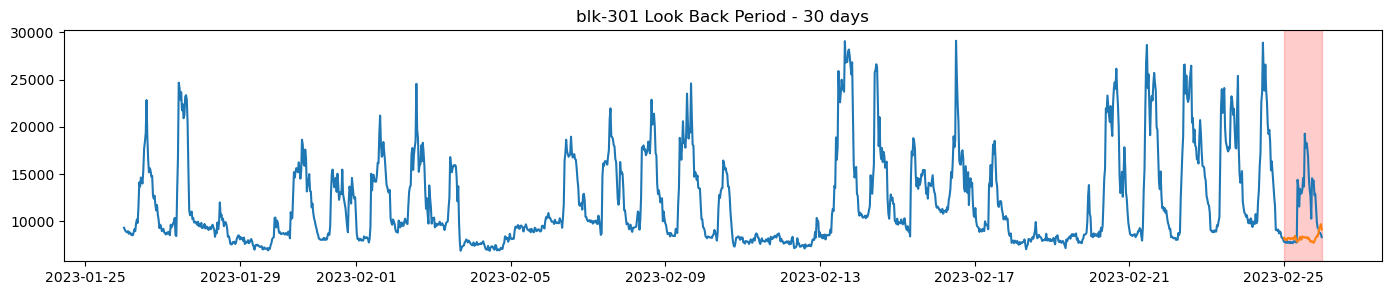

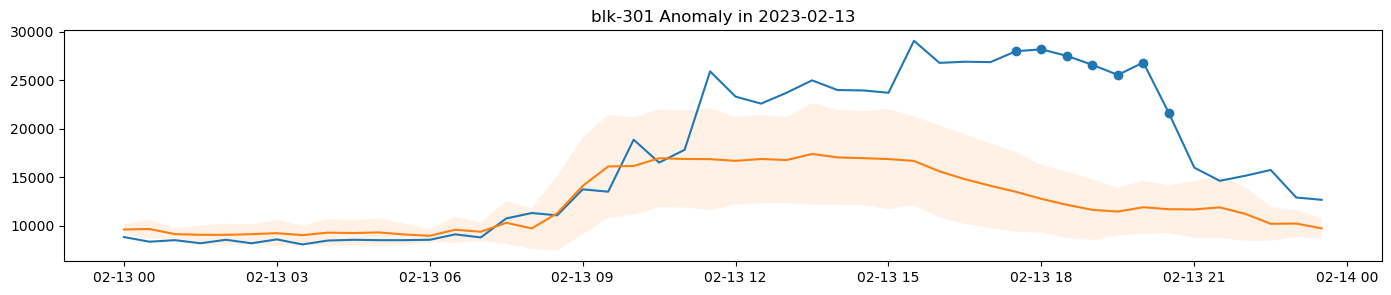

Sequence Anomaly observed
Sequence Anomaly observed from 2023-02-13 17:30:00 to 2023-02-13 20:30:00 
Deviation: 99170.71 Wh, Deviation % = 16.6% 



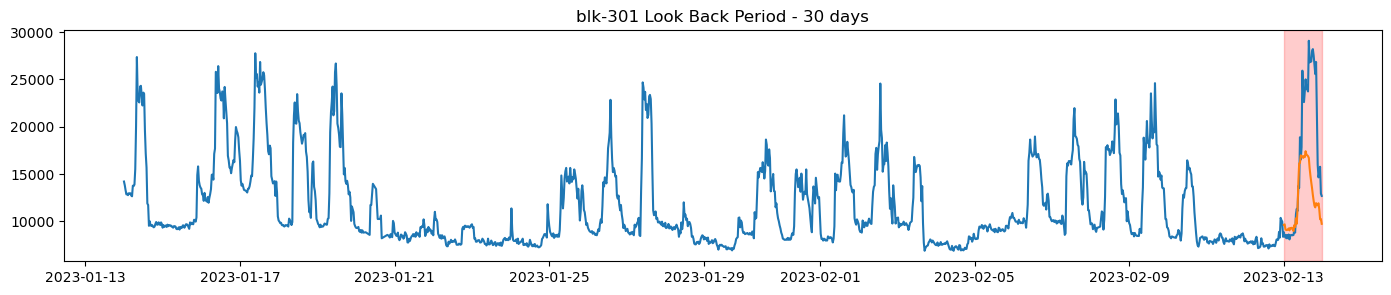

In [2]:
import os
import pandas as pd
import glob
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from ispots.anomaly_detector import AutoAD, Preprocessor

# load data into a dictionary
#elec_input_folder = "inputdata/" + 'JC' + "/electrical/monthly/"
'''
path = os.path.abspath('JC/electrical')
csv_files = glob.glob(os.path.join(path, "*.csv"))
pre_data_dict = {}
for f in csv_files:
    df = pd.read_csv(f)
    pre_data_dict[f.split("/")[-1][:-4]] = df

    
# preprocess data
preprocessor = Preprocessor(pre_data_dict, miss_val_threshold = 0.01)
data_dict = preprocessor.preprocess()

# statistic method
anomalies_detected_dates = []
lookback_period = 30
sort_by = 'deviation_percentage'
dev_perc_threshold = 5
namespace = 'JC'
unit_of_measurement = 'Wh'
blk = 'blk-301'

ad_detector = AutoAD(namespace = 'JC', data_frequency = preprocessor.data_frequency, method = 'statistic', unit_of_measurement = unit_of_measurement, lookback_period = lookback_period)

start_date = pd.to_datetime('2023-2-1') 
end_date = pd.to_datetime('2023-2-28')    
score_dict = ad_detector.detect(data_dict = data_dict, detect_date = start_date)
score_dict_copy = score_dict.copy()

for mp in score_dict.keys():
    mp_new = str(mp) + str(start_date.date())
    score_dict_copy[mp_new] = score_dict_copy.pop(mp)
score_dict = score_dict_copy

detection_date = start_date + pd.Timedelta(1, unit='d')
while detection_date <= end_date:
    score_dict_append = ad_detector.detect(data_dict = data_dict, detect_date = detection_date)
    score_dict_copy = score_dict_append.copy()
    for mp in score_dict_append.keys():
        mp_new = str(mp) + str(detection_date.date())
        score_dict_copy[mp_new] = score_dict_copy.pop(mp)
    score_dict_append = score_dict_copy
    score_dict.update(score_dict_append)
    detection_date += pd.Timedelta(1, unit='d')

#print(score_dict)

if blk == None:
    score_lst = list(score_dict.values())

else:
    score_dict_copy = {}
    for each in score_dict.keys():
        if blk in each:
            score_dict_copy[each] = score_dict[each]
    score_dict = score_dict_copy
    score_lst = list(score_dict.values())

for each in score_dict.keys():
    print(each)

score_lst.sort(reverse = True, key = lambda x:x[sort_by]) # use deviation to sort
print(bool(score_lst) == False)
# report the top 5 anomalies 

count = 0
for i in range(min(5, len(data_dict))):
    if count == min(5, len(data_dict)): 
        break
    if bool(score_lst) == False: 
        print('coooool')
        break
    # measuring point is reported only if total percentage deviation exceeds threshold
    if np.abs(score_lst[i]['deviation_percentage']) < dev_perc_threshold: 
        continue   

    else:
        # retrieve values on measuring point
        mp = score_lst[i]['measuring point']
        score_df = score_lst[i]['score dataframe']
        deviation_val = score_lst[i]['deviation']
        deviation_per = score_lst[i]['deviation_percentage']
        date = score_df.index[0].date()

        count += 1
        # print overall anomaly message
        print(f'Namespace: {namespace}')
        print(f'NO {count} anomalous measuring point: {mp}')
        print(f'Date of detection: {date}')
        print(f'Deviation: {deviation_val} {unit_of_measurement}, Deviation %: {deviation_per}%')

        # retrieve data for detection date + look back period
        full_df = data_dict[mp]
        long_df = full_df.loc[(full_df.index <= score_df.index[-1]) & 
                            (full_df.index >= score_df.index[0] - dt.timedelta(days=lookback_period))].copy()
        
        # plot the consumption data for reference
        #if plot:
            # plot for detection date
        fig, ax = plt.subplots(figsize=(17, 3))
        ax.plot(score_df.index, score_df.Value)
        ax.plot(score_df.index, score_df.pred)
        ax.scatter(score_df[score_df.anomaly == True].index, score_df[score_df.anomaly == True].Value)
        ax.fill_between(score_df.index, score_df.pred_low, score_df.pred_high, alpha = 0.1)
        ax.title.set_text(mp[5:12] +  ' Anomaly in ' + str(date)) #blk-218 anomaly in 2023-02-01
        plt.show()
        ax.figure.savefig('./output/JC/anomaly_output_img/' + mp[5:12] +  '_' + str(date) +'_day.png') #,  bbox_inches = 'tight') #30SCE_monthly.png

        #if report:
        # generate anomaly message
        anomaly_message = ad_detector.anomaly_message(score_df)
        print(anomaly_message)

        # plot detection date + lookback period
        fig, ax = plt.subplots(figsize=(17, 3))
        ax.plot(long_df.index, long_df.Value)
        ax.plot(score_df.index, score_df.pred)
        ax.axvspan(score_df.index[0], score_df.index[-1], alpha=0.2, color='r')
        ax.title.set_text(mp[5:12] +  ' Look Back Period - ' + str(lookback_period) + ' days') #blk-218 look back period - 30 days
        ax.figure.savefig('./output/JC/anomaly_output_img/' + mp[5:12] +  '_' + str(date) +'_period.png')
        
        #ad_detector.top_k(k = 1, sort_by = 'deviation_percentage', report = True, plot = True, dev_perc_threshold = 5)
    #if count > 0:
    #    anomalies_detected_dates.append(detection_date)
        #detection_date += pd.Timedelta(1, unit='d')

'''

In [1]:
def anomaly_detection(root_path, input_path, output_img_folder, start_date, end_date ,lookback_period , top_k ,camp_fullname, unit_of_measurement, miss_val_threshold, blk = None):
    # load data into a dictionary
    path = os.path.abspath(input_path[:-1])
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    pre_data_dict = {}
    for f in csv_files:
        df = pd.read_csv(f)
        pre_data_dict[f.split("/")[-1][:-4]] = df
        
    # preprocess data
    preprocessor = Preprocessor(pre_data_dict, miss_val_threshold = miss_val_threshold)
    data_dict = preprocessor.preprocess()

    # statistic method
    anomalies = {}
    lookback_period = lookback_period
    sort_by = 'deviation_percentage'
    dev_perc_threshold = 5
    namespace = camp_fullname
    unit_of_measurement = unit_of_measurement

    ad_detector = AutoAD(namespace = camp_fullname, data_frequency = preprocessor.data_frequency, method = 'statistic', unit_of_measurement = unit_of_measurement, lookback_period = lookback_period)

    start_date = pd.to_datetime(start_date) 
    end_date = pd.to_datetime(end_date)    
    score_dict = ad_detector.detect(data_dict = data_dict, detect_date = start_date)
    score_dict_copy = score_dict.copy()
    for mp in score_dict.keys():
        mp_new = str(mp) + str(start_date.date())
        score_dict_copy[mp_new] = score_dict_copy.pop(mp)
        score_dict = score_dict_copy

    detection_date = start_date + pd.Timedelta(1, unit='d')
    while detection_date <= end_date:
        score_dict_append = ad_detector.detect(data_dict = data_dict, detect_date = detection_date)
        score_dict_copy = score_dict_append.copy()
        for mp in score_dict_append.keys():
            mp_new = str(mp) + str(detection_date.date())
            score_dict_copy[mp_new] = score_dict_copy.pop(mp)
        score_dict_append = score_dict_copy
        score_dict.update(score_dict_append)
        detection_date += pd.Timedelta(1, unit='d')

    if blk == None:
        score_lst = list(score_dict.values())
        type = 'all'
    else:
        score_dict_copy = {}
        type = ''
        for each in score_dict.keys():
            if blk in each:
                score_dict_copy[each] = score_dict[each]
        score_dict = score_dict_copy
        score_lst = list(score_dict.values())

    #score_lst = list(score_dict.values())
    score_lst.sort(reverse = True, key = lambda x:x[sort_by]) # use deviation to sort
    # report the top 5 anomalies 
    count = 0
    for i in range(min(top_k, len(data_dict))):
        if count == min(top_k, len(data_dict)) | bool(score_lst) == False: 
            break
        if bool(score_lst) == False: 
            break
        # measuring point is reported only if total percentage deviation exceeds threshold
        if np.abs(score_lst[i]['deviation_percentage']) < dev_perc_threshold: 
            continue
        else:
            # retrieve values on measuring point
            mp = score_lst[i]['measuring point']
            score_df = score_lst[i]['score dataframe']
            deviation_val = score_lst[i]['deviation']
            deviation_per = score_lst[i]['deviation_percentage']
            date = score_df.index[0].date()

            count += 1
            # print overall anomaly message
            print(f'Namespace: {namespace}')
            print(f'NO {count} anomalous measuring point: {mp}')
            print(f'Date of detection: {date}')
            print(f'Deviation: {deviation_val} {unit_of_measurement}, Deviation %: {deviation_per}%')

            # retrieve data for detection date + look back period
            full_df = data_dict[mp]
            long_df = full_df.loc[(full_df.index <= score_df.index[-1]) & 
                                (full_df.index >= score_df.index[0] - dt.timedelta(days=lookback_period))].copy()
            
            # plot the consumption data for reference
            #if plot:
                # plot for detection date
            fig, ax = plt.subplots(figsize=(17, 3))
            ax.plot(score_df.index, score_df.Value, label = 'Actual Consumption')
            ax.plot(score_df.index, score_df.pred, label = 'Expected Consumption')
            ax.scatter(score_df[score_df.anomaly == True].index, score_df[score_df.anomaly == True].Value, label = 'Estimated Anomaly')
            ax.fill_between(score_df.index, score_df.pred_low, score_df.pred_high, alpha = 0.1)
            ax.title.set_text(mp[5:12] +  ' Daily Anomalous Consumption on ' + str(date)) #blk-218 daily anomalous consumption on 2023-02-03
            ax.set_ylim(score_df.Value.min(), score_df.Value.max()*1.4)
            ax.legend(loc = 'upper left', fontsize = 10)
            ax.figure.savefig(root_path + output_img_folder + type + '_' + mp[5:12] +  '_' + str(date) +'_day.png') #,  bbox_inches = 'tight') #30SCE_monthly.png

            #if report:
            # generate anomaly message
            anomaly_message = ad_detector.anomaly_message(score_df)
            print(anomaly_message)

            # plot detection date + lookback period
            fig, ax = plt.subplots(figsize=(17, 3))
            ax.plot(long_df.index, long_df.Value, label = 'Actual Consumption')
            ax.plot(score_df.index, score_df.pred, label = 'Expected Consumption')
            ax.axvspan(score_df.index[0], score_df.index[-1], alpha=0.2, color='r')
            ax.title.set_text('Consumption Comparison with Past ' + str(lookback_period) + ' days') #Consumption comparison with past 30 days
            ax.set_ylim(long_df.Value.min(), long_df.Value.max())
            ax.legend(loc = 'upper left', fontsize = 10)
            ax.figure.savefig(root_path + output_img_folder + type + '_' + mp[5:12] +  '_' + str(date) +'_period.png')
            anomalies[count] = {'blk':mp, 'date':date, 'deviation':deviation_val, 'unit_of_measurement': unit_of_measurement, 'deviation_percentage': deviation_per} 

    return anomalies

                    

In [3]:
root_path = "./"
# define selected month
select_month = '2023-02'
# camp name
camp = 'JC'
camp_fullname = 'Jurong Camp'
gfa_file_path_name = root_path+"inputdata/" + camp + "/chateristic/GFA_JC.csv"
# electricity files path
elec_input_folder = "inputdata/" + camp + "/electrical/monthly/"
elec_output_img_folder = "output/" + camp + "/elec_output_img/"
elec_output_csv_folder = "output/" + camp + "/elec_output_csv/"
elec_raw_path = root_path + elec_input_folder + "*.csv"
elec_multifloor_input_folder = "inputdata/" + camp + "/electrical/multifloor/"
elec_floor_output_folder = "output/" + camp + '/floorlevel/'
elec_rawpath = "./rawdata/"+camp+"_elect/"
elec_anomaly_output_folder = 'output/JC/anomaly_output_img/'

# water files path
water_input_folder = "inputdata/" + camp + "/water/monthly/"
water_multifloor_input_folder = "inputdata/" + camp + "/water/multifloor/monthly/"
water_output_img_folder = "output/" + camp + "/water_output_img/"
water_output_csv_folder = "output/" + camp + "/water_output_csv/"
water_raw_path = root_path + water_input_folder + "*.csv"
water_floor_output_folder = "output/" + camp + 'floorlevel_water'
water_rawpath = "./rawdata/"+camp+"_water/"
water_rawpath = "./rawdata/"+camp+"_water/"

# monthly report path
report_output_folder = 'monthly_report_pdf/' + camp


# step 3. monthly consumption by unit
    # when creating dict by unit, put all the building used by unit in the same key
func_dic_elec_unit = {
                    '30SCE': ['dsta_blk-301-elect', 'dsta_blk-302-elect', 'dsta_blk-303-elect'],
                    '17C4I': ['dsta_blk-124-elect', 'dsta_blk-125-elect', 'dsta_blk-126-elect', 'dsta_blk-127-elect','dsta_blk-105-elect','dsta_blk-102-elect'],
                    '9AMB': ['dsta_blk-322-elect'],
                    'HQ 3 DIV': ['dsta_blk-101-elect','dsta_blk-100-elect'],
                    'SBW': ['dsta_blk-202-elect','dsta_blk-209-elect','dsta_blk-221-elect','dsta_blk-223-elect','dsta_blk-207-elect','dsta_blk-210-elect'],
                    'TPT HUB WEST': ['dsta_blk-201-elect'],
                    'ICTC 1':['dsta_blk-216-elect'],
                    'ICTC 2': ['dsta_blk-218-elect'],
                    'HQ ITI': ['dsta_blk-213-elect'],
                    '3DIV':['dsta_blk-102-elect'],
                    '3AMB':['dsta_blk-102-elect','dsta_blk-105-elect']
                    }
func_dic_water_unit = {
                    '30SCE': ['dsta_blk-301-water', 'dsta_blk-302-water', 'dsta_blk-303-water'],
                    '17C4I': ['dsta_blk-124-water', 'dsta_blk-125-water', 'dsta_blk-126-water', 'dsta_blk-127-water','dsta_blk-105-water','dsta_blk-102-water'],
                    '9AMB': ['dsta_blk-322-water'],
                    'HQ 3 DIV': ['dsta_blk-101-water','dsta_blk-100-water'],
                    'SBW': ['dsta_blk-202-water','dsta_blk-209-water','dsta_blk-221-water','dsta_blk-223-water','dsta_blk-207-water','dsta_blk-210-water'],
                    'TPT HUB WEST': ['dsta_blk-201-water'],
                    'ICTC 1':['dsta_blk-216-water'],
                    'ICTC 2': ['dsta_blk-218-water'],
                    'HQ ITI': ['dsta_blk-213-water'],
                    '3DIV':['dsta_blk-102-water'],
                    '3AMB':['dsta_blk-102-water','dsta_blk-105-water']
                    }
miss_val_threshold = 0.01

dsta_blk-126-elect: missing values 47
dsta_blk-221-elect: missing values 32
dsta_blk-302-elect: missing values 38
dsta_blk-101-elect: missing values 24
dsta_blk-127-elect: missing values 32
dsta_blk-201-elect: missing values 37
dsta_blk-303-elect: missing values 31
dsta_blk-100-elect: missing values 40
dsta_blk-322-elect: missing values 34
dsta_blk-207-elect: missing values 34
dsta_blk-213-elect: missing values 32
dsta_blk-124-elect: missing values 36
dsta_blk-223-elect: missing values 33
dsta_blk-216-elect: missing values 33
dsta_blk-202-elect: missing values 31
dsta_blk-209-elect: missing values 39
Namespace: Jurong Camp
NO 1 anomalous measuring point: dsta_blk-301-elect
Date of detection: 2023-02-25
Deviation: 147530.0 Wh, Deviation %: 37.22%
Sequence Anomaly observed
Sequence Anomaly observed from 2023-02-25 08:30:00 to 2023-02-25 20:00:00 
Deviation: 147530.0 Wh, Deviation % = 37.22% 

Namespace: Jurong Camp
NO 2 anomalous measuring point: dsta_blk-301-elect
Date of detection: 202

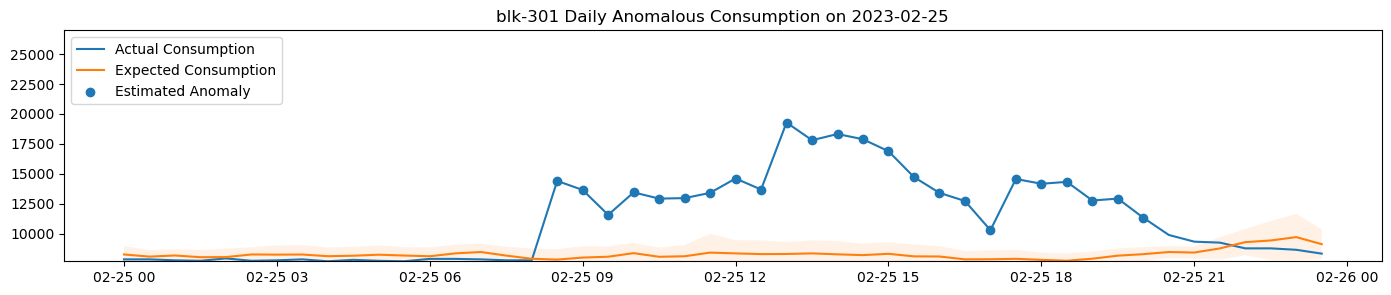

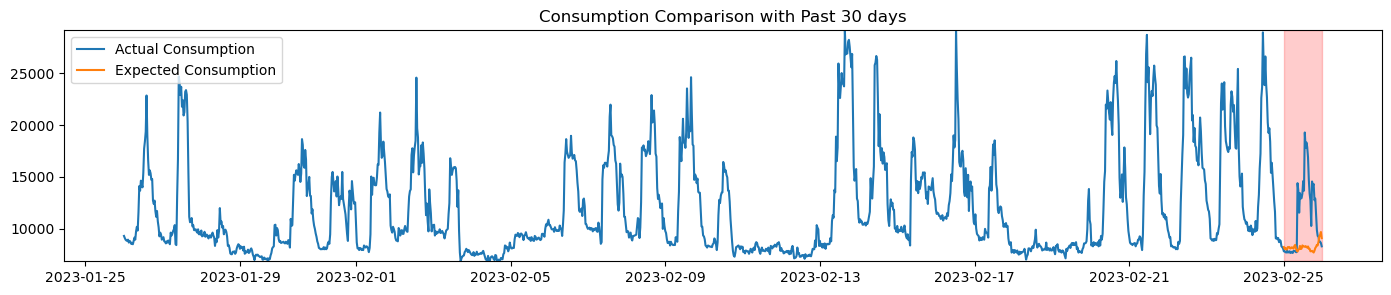

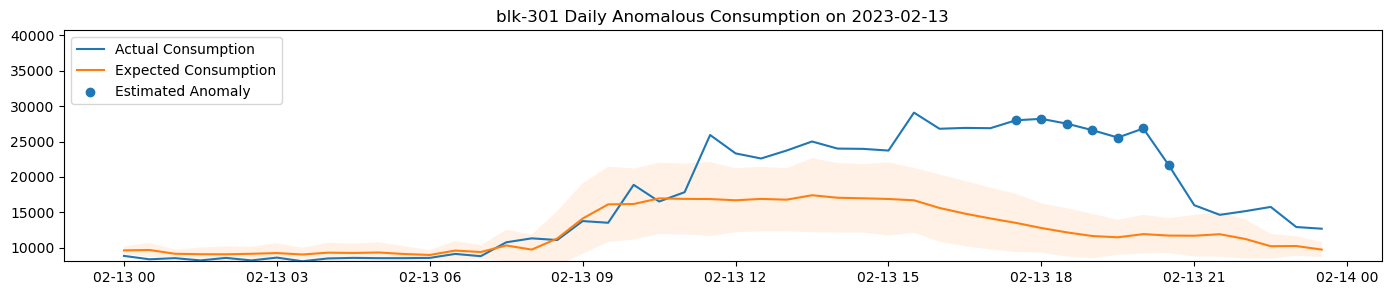

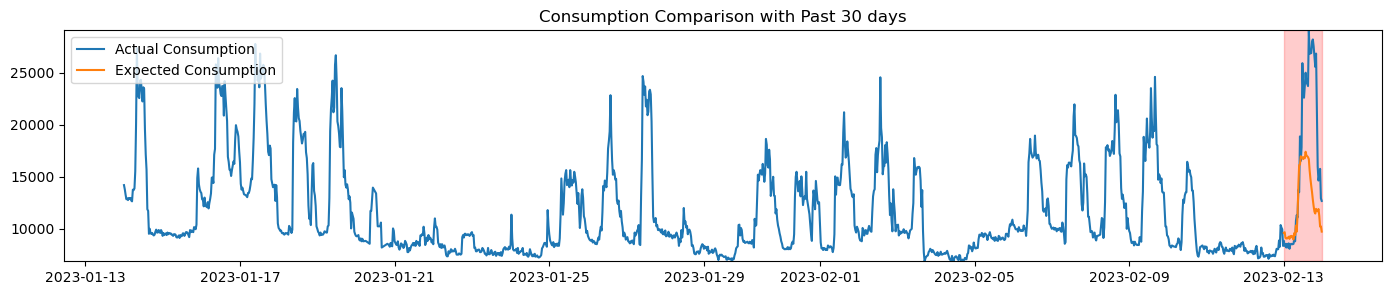

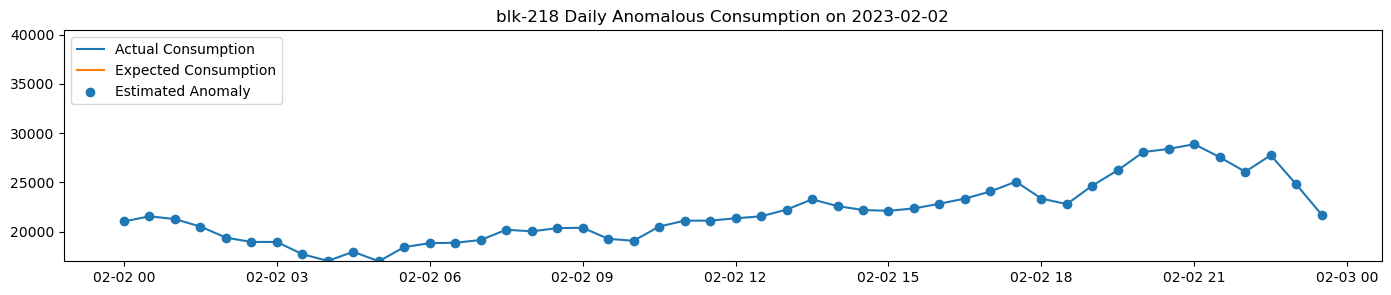

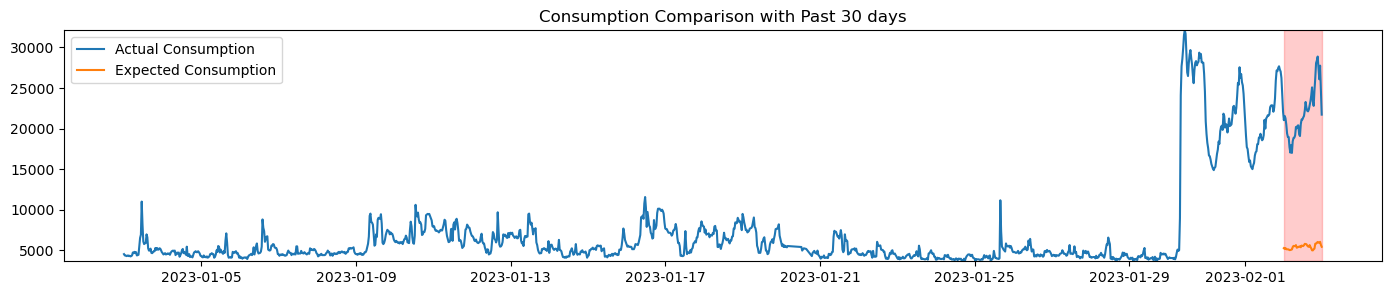

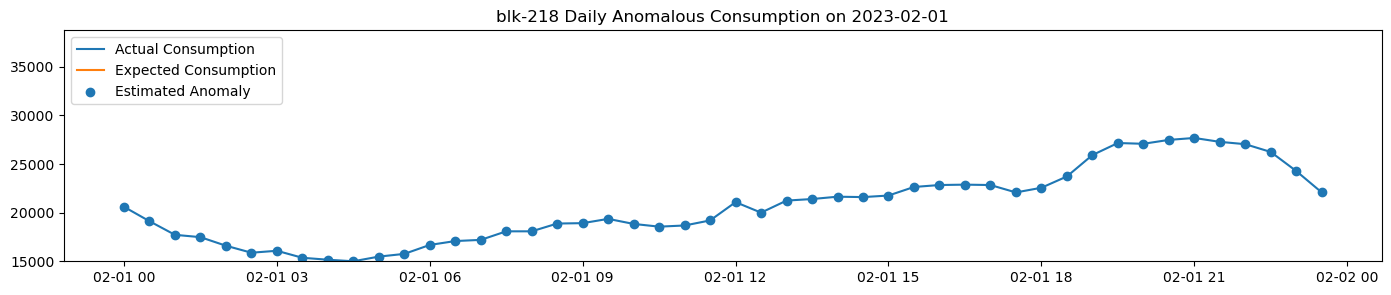

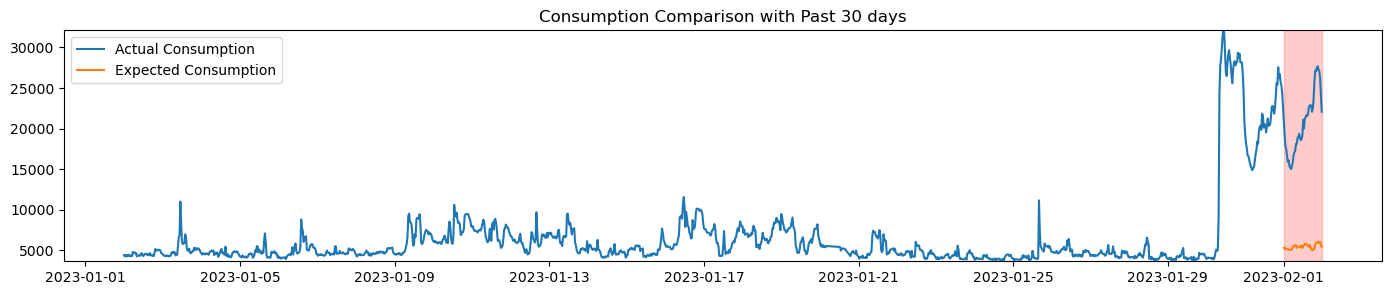

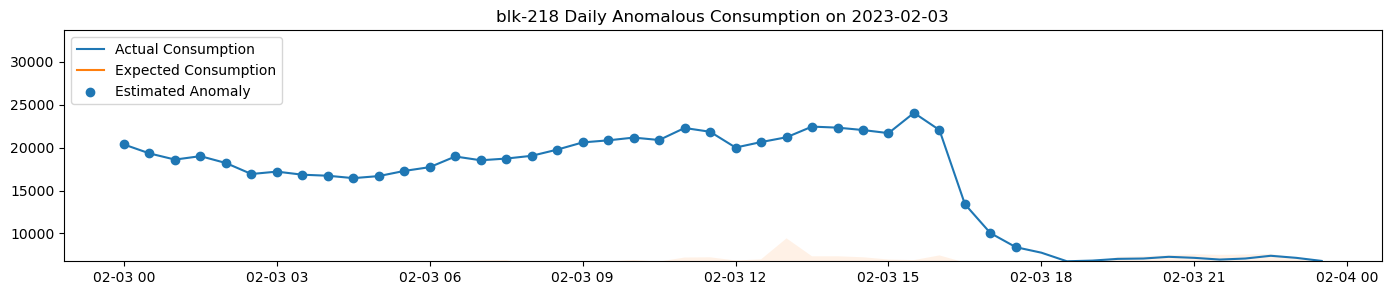

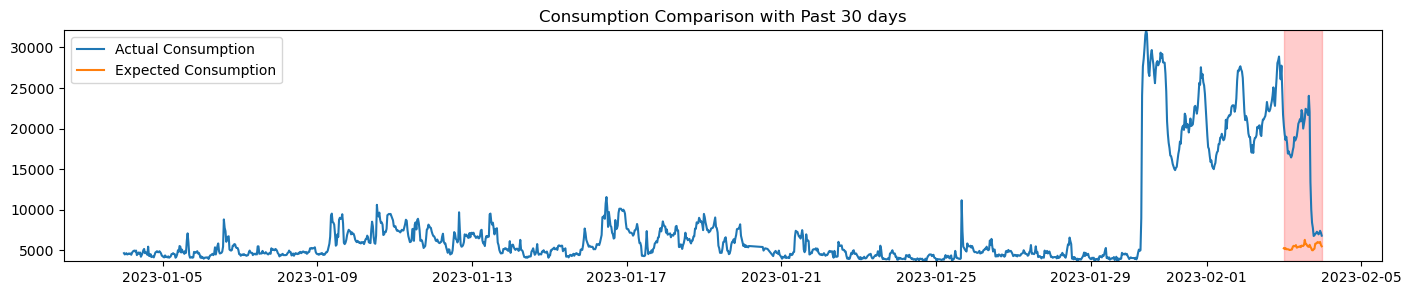

In [9]:
anomalies_301 = anomaly_detection(root_path = root_path, input_path = elec_input_folder, output_img_folder= elec_anomaly_output_folder, 
                start_date = '2023-2-1', end_date = '2023-2-28' ,lookback_period = 30 , 
                top_k = 5,camp_fullname = camp_fullname, unit_of_measurement = 'Wh', miss_val_threshold = miss_val_threshold, blk = 'blk-301')
anomalies_218 = anomaly_detection(root_path = root_path, input_path = elec_input_folder, output_img_folder= elec_anomaly_output_folder, 
                start_date = '2023-2-1', end_date = '2023-2-28' ,lookback_period = 30 , 
                top_k = 5,camp_fullname = camp_fullname, unit_of_measurement = 'Wh', miss_val_threshold = miss_val_threshold, blk = 'blk-218')

In [10]:
anomalies_301

{1: {'blk': 'dsta_blk-301-elect',
  'date': datetime.date(2023, 2, 25),
  'deviation': 147530.0,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 37.22},
 2: {'blk': 'dsta_blk-301-elect',
  'date': datetime.date(2023, 2, 13),
  'deviation': 99170.71,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 16.6}}

In [11]:
anomalies_218

{1: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 2),
  'deviation': 790858.8,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 302.48},
 2: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 1),
  'deviation': 728662.64,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 278.48},
 3: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 3),
  'deviation': 487918.67,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 186.16}}

In [26]:
test = []
n = 0
for key, value in anomalies_301.items():
    test.append(value)
for key, value in anomalies_218.items():
    test.append(value)

print(test)

[{'blk': 'dsta_blk-301-elect', 'date': datetime.date(2023, 2, 25), 'deviation': 147530.0, 'unit_of_measurement': 'Wh', 'deviation_percentage': 37.22}, {'blk': 'dsta_blk-301-elect', 'date': datetime.date(2023, 2, 13), 'deviation': 99170.71, 'unit_of_measurement': 'Wh', 'deviation_percentage': 16.6}, {'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 2), 'deviation': 790858.8, 'unit_of_measurement': 'Wh', 'deviation_percentage': 302.48}, {'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 1), 'deviation': 728662.64, 'unit_of_measurement': 'Wh', 'deviation_percentage': 278.48}, {'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 3), 'deviation': 487918.67, 'unit_of_measurement': 'Wh', 'deviation_percentage': 186.16}]


In [27]:
# take second element for sort
def takeSecond(elem):
    return elem['deviation_percentage']

# random list
test

# sort list with key
test.sort(key=takeSecond, reverse=True)

# print list
print('Sorted list:', test)

Sorted list: [{'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 2), 'deviation': 790858.8, 'unit_of_measurement': 'Wh', 'deviation_percentage': 302.48}, {'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 1), 'deviation': 728662.64, 'unit_of_measurement': 'Wh', 'deviation_percentage': 278.48}, {'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 3), 'deviation': 487918.67, 'unit_of_measurement': 'Wh', 'deviation_percentage': 186.16}, {'blk': 'dsta_blk-301-elect', 'date': datetime.date(2023, 2, 25), 'deviation': 147530.0, 'unit_of_measurement': 'Wh', 'deviation_percentage': 37.22}, {'blk': 'dsta_blk-301-elect', 'date': datetime.date(2023, 2, 13), 'deviation': 99170.71, 'unit_of_measurement': 'Wh', 'deviation_percentage': 16.6}]


In [31]:
test = test[0:3]

In [35]:
cool = {}
n = 0
for each in test:
    n += 1
    print(each)
    cool[n]= each
cool


{'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 2), 'deviation': 790858.8, 'unit_of_measurement': 'Wh', 'deviation_percentage': 302.48}
{'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 1), 'deviation': 728662.64, 'unit_of_measurement': 'Wh', 'deviation_percentage': 278.48}
{'blk': 'dsta_blk-218-elect', 'date': datetime.date(2023, 2, 3), 'deviation': 487918.67, 'unit_of_measurement': 'Wh', 'deviation_percentage': 186.16}


{1: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 2),
  'deviation': 790858.8,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 302.48},
 2: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 1),
  'deviation': 728662.64,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 278.48},
 3: {'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 3),
  'deviation': 487918.67,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 186.16}}

In [41]:
test[0:1]

[{'blk': 'dsta_blk-218-elect',
  'date': datetime.date(2023, 2, 2),
  'deviation': 790858.8,
  'unit_of_measurement': 'Wh',
  'deviation_percentage': 302.48}]

In [49]:
a = []
for each in a:
    print(each)

In [ ]:
for key, value in func_dic_elec_unit.item():
    for blk in value:
        anomaly_detection(root_path = root_path, input_path = elec_input_folder, output_img_folder= elec_anomaly_output_folder, 
                start_date = '2023-2-1', end_date = '2023-2-28' ,lookback_period = 30 , 
                top_k = 5,camp_fullname = camp_fullname, unit_of_measurement = 'Wh', miss_val_threshold = miss_val_threshold, blk = 'blk-301')